# Maestría en Inteligencia Artificial Aplicada

# TC 4033: Visión computacional para imágenes y video

# Tecnológico de Monterrey

## Dr. Gilberto Ochoa Ruiz

# **# 7. Harris Edge & Corner Detection**

## **Equipo # 16**
### Edwin David Hernández Alejandre A01794692
### Miguel Guillermo Galindo Orozco A01793695
### Jorge Pedroza Rivera A01319553
### Juan Carlos Alvarado Carricarte A01793486
### Gerardo Aaron Castañeda Jaramillo A01137646

## Table of Contents
1. [Libraries](#libraries)
2. [Color image to Grayscale conversion](#grayscale)
3. [Spatial derivative calculation](#spatial)
4. [Structure tensor setup](#tensor)
5. [Harris response calculation](#response)
6. [Find edges and corners using R](#find)
7. [Ejercicio 1](#ejercicio1)
8. [Conclusiones](#conclusiones)
9. [Referencias](#referencias)

## 1. Importing Libraries <a class="anchor" id="libraries" ></a>

In [1]:
import cv2
import matplotlib.pyplot as plt
from scipy import signal as sig
import numpy as np
from scipy.ndimage import convolve

## 2. Color to Grayscale <a class="anchor" id="grayscale" ></a>

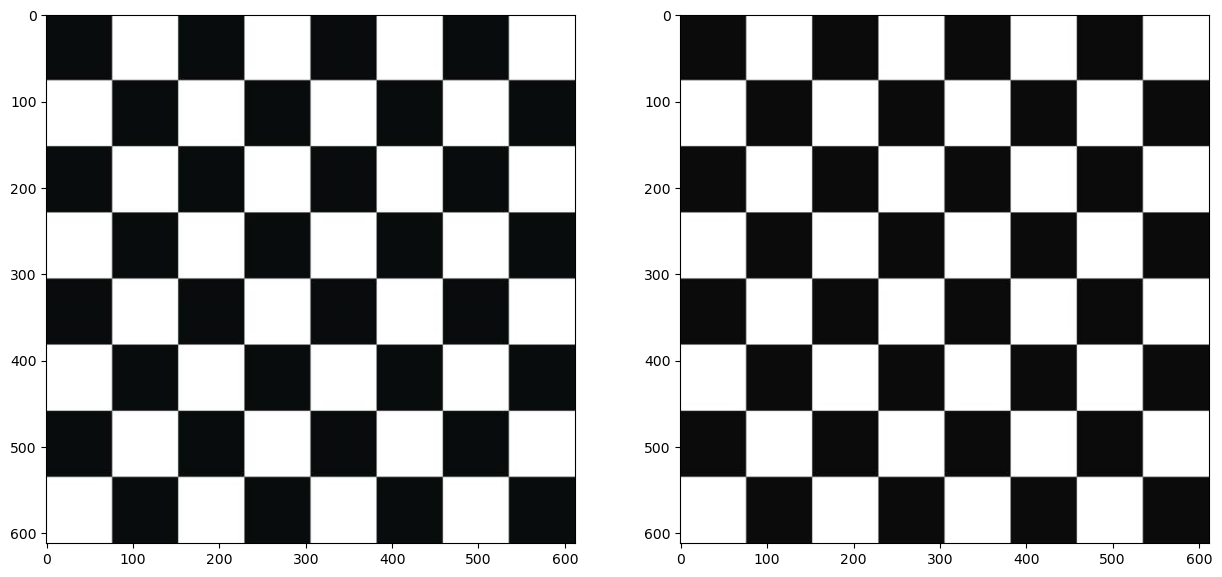

In [2]:
img = cv2.imread('data/chessboard.jpg')
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_color)
plt.subplot(1, 2, 2)
plt.imshow(img_gray, cmap="gray")

## 3. Spatial derivative calculation <a class="anchor" id="spatial" ></a>

In [3]:
def gradient_x(imggray):
    ##Sobel operator kernels.
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return sig.convolve2d(imggray, kernel_x, mode='same')

def gradient_y(imggray):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return sig.convolve2d(imggray, kernel_y, mode='same')

I_x = gradient_x(img_gray)
I_y = gradient_y(img_gray)

## 4. Structure tensor setup <a class="anchor" id="tensor" ></a>

In [4]:
def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g


Ixx = convolve(I_x**2, gaussian_kernel(3, 1))
Ixy = convolve(I_y*I_x, gaussian_kernel(3, 1))
Iyy = convolve(I_y**2, gaussian_kernel(3, 1))

## 5. Harris response calculation <a class="anchor" id="response" ></a>

In [5]:
k = 0.05

# determinant
detA = Ixx * Iyy - Ixy ** 2

# trace
traceA = Ixx + Iyy
    
harris_response = detA - k * traceA ** 2

In [6]:
img_gray.shape

(612, 612)

In [7]:
window_size = 3
offset = window_size//2
width, height = img_gray.shape

for y in range(offset, height-offset):
    for x in range(offset, width-offset):
        Sxx = np.sum(Ixx[y-offset:y+1+offset, x-offset:x+1+offset])
        Syy = np.sum(Iyy[y-offset:y+1+offset, x-offset:x+1+offset])
        Sxy = np.sum(Ixy[y-offset:y+1+offset, x-offset:x+1+offset])

In [8]:
#Find determinant and trace, use to get corner response
det = (Sxx * Syy) - (Sxy**2)
trace = Sxx + Syy
r = det - k*(trace**2)

## 6. Find edges and corners using R <a class="anchor" id="find" ></a>

In [9]:
img_copy_for_corners = np.copy(img)
img_copy_for_edges = np.copy(img)

for rowindex, response in enumerate(harris_response):
    for colindex, r in enumerate(response):
        if r > 0:
            # this is a corner
            img_copy_for_corners[rowindex, colindex] = [255,0,0]
        elif r < 0:
            # this is an edge
            img_copy_for_edges[rowindex, colindex] = [0,255,0]

In [10]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_copy_for_corners, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(img_copy_for_edges, cmap="gray")

## 7. Ejercicio 1 <a class="anchor" id="ejercicio1" ></a>

En el Collab de Harris Detector, se sugiere que se hagan pruebas con imágenes propias que el equipo decida usar. La idea  es escoger un objeto y tomar fotos con diferentes tipos de iluminación (bajo el sol, en un lugar oscuro) y bajo diferentes ángulos para analizar el comportamiento del detector de Harris bajo diferentes settings

Importamos un total de 9 imágenes de un mismo objeto. 3 ángulos, y 3 tipos de iluminación diferente.

In [11]:
images = []
for i in range(1,10):
    images.append(cv2.imread('data/pig_'+str(i)+'.jpg'))

Los graficamos para visualizarlo

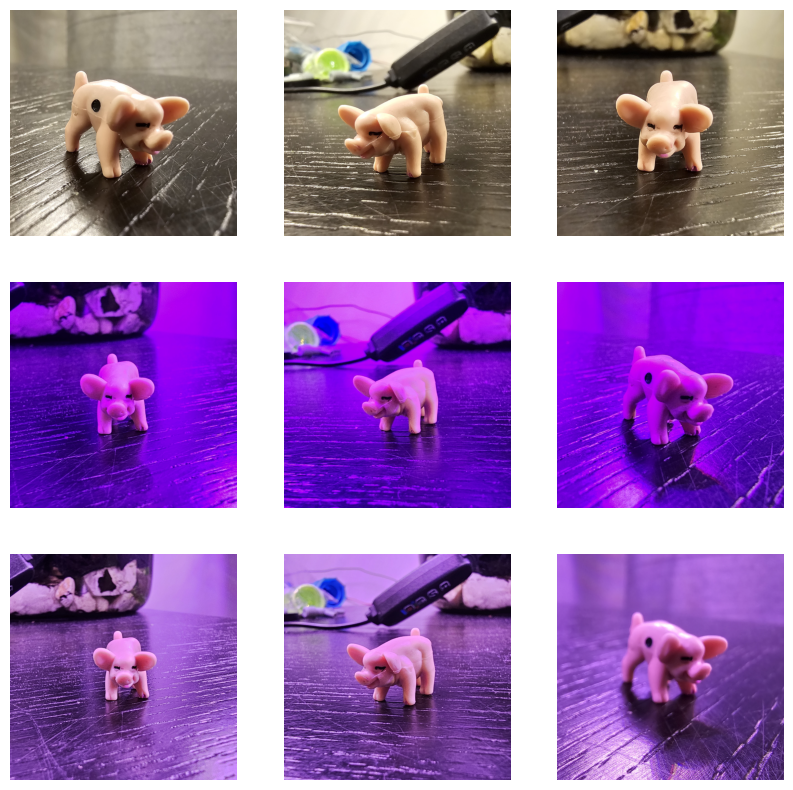

In [12]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

for i in range(3):
    for j in range(3):
        axs[i, j].imshow(cv2.cvtColor(images[i * 3 + j], cv2.COLOR_BGR2RGB))
        axs[i, j].axis('off')

plt.show()

Definimos nuestras funciones, con base al código ejemplo, que nos servirán para aplicar el algoritmo de Harris en las imágenes. 

In [21]:
def gradient_x(imggray):
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return sig.convolve2d(imggray, kernel_x, mode='same')

def gradient_y(imggray):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return sig.convolve2d(imggray, kernel_y, mode='same')

def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

def gradient_gaussian(imggray, size=5, sigma = 50):

    Ixx = convolve(gradient_x(imggray)**2, gaussian_kernel(size, sigma))
    Ixy = convolve(gradient_y(imggray)*gradient_x(imggray), gaussian_kernel(size, sigma))
    Iyy = convolve(gradient_y(imggray)**2, gaussian_kernel(size, sigma))

    return Ixx, Ixy, Iyy

def harris_edge(img, kernel=3, sigma=40, k=0.01):
    
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    matrix = gradient_gaussian(img_gray, kernel, sigma)
    det = matrix[0] * matrix[2] - matrix[1]**2                          
    trace = matrix[0] + matrix[2]
    
    harris_response = det - k * trace ** 2

    img_copy_for_corners = np.copy(img)
    img_copy_for_edges = np.copy(img)

    for rowindex, response in enumerate(harris_response):
        for colindex, r in enumerate(response):
            if r > 0:
                # this is a corner
                img_copy_for_corners[rowindex, colindex] = [255,0,0]
            elif r < 0:
                # this is an edge
                img_copy_for_edges[rowindex, colindex] = [0,255,0]

    return img_copy_for_corners, img_copy_for_edges

Aplicamos nuestra funciones de Harris para cada imagen, y graficamos sus respectivos 2 resultados en una fila. 

In [22]:
num_images = len(images)

fig, axs = plt.subplots(num_images, 2, figsize=(10, 5*num_images))
for i, image in enumerate(images):
    processed_image1, processed_image2 = harris_edge(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    axs[i, 0].imshow(processed_image1)
    axs[i, 0].axis('off')
    axs[i, 1].imshow(processed_image2)
    axs[i, 1].axis('off')

plt.show()

# **8. Conclusiones** <a class="anchor" id="conclusiones" ></a>

El algoritmo de Harris fue desarrollado pensando en detectar las esquinas en imágenes. Este se trabaja comúnmente con imágenes en escala de grises. A las cuales comúnmente puede añadirse un filtro gaussiano para filtrar ruido. Este método funciona calculando las derivadas parciales Ix y Iy utilizando mascaras de derivadas. Las cuales representan el cambio de intensidad en las direcciones horizontales y verticales. Para cada pixel, se construye una matriz de covarianza, las cuales se utilizan para ponderar los valores de los pixeles en la vecindad del pixel actual. Seguido, para cada pixel se calcula la respuesta del detector de esquinas utilizando la matriz previa. Y los pixeles con valores del calculo arriba de un umbral definido previamente, se consideran esquinas. 

Se utilizaron 9 imágenes del mismo objeto. 3 tipos de iluminación diferente, y 3 ángulos para cada tipo de iluminación. Esto para poder apreciar cómo funciona el método bajo diferentes orientaciones, y diferente iluminación. Aunque se nota un ligero cambio en la respuesta del método, en general se observa que funciona para todos los escenarios presentados. Con excepción del segundo tipo de iluminación (luz UV). Que funciona, pero de menor manera. Aunque, nuestro objeto no tiene muchas esquinas, fácil apreciar su funcionamiento con su detección de bordes. 

De igual manera se comenta que se terminaron definiendo los valores de nuestro filtro gaussiano y de K en nuestro método mediante prueba y error. Se fue experimentando con diferentes valores hasta encontrar aquellos que nos parecieron suficientemente buenos. 

# **9. Referencias** <a class="anchor" id="referencias" ></a>

* Berrios, I. (2023). Harris Corner and Edge Detector. Retrieved from Medium: https://medium.com/@itberrios6/harris-corner-and-edge-detector-4169312aa2f8

* Bradski, G. (2000). The OpenCV Library. Dr. Dobb's Journal of Software Tools.

* Gonzalez, R., & Woods, R. (2018). Digital Image Processing. Pearson.

* OpenCV. (n.d.). Harris Corner Detection. Retrieved from OpenCV: https://docs.opencv.org/4.x/dc/d0d/tutorial_py_features_harris.html

* OpenCV. (n.d.). Harris corner detector. Retrieved from OpenCV: https://docs.opencv.org/4.x/d4/d7d/tutorial_harris_detector.html

